In [4]:
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.models import Sequential, Model
from ipywidgets import interact,interact_manual
from keras.datasets import mnist

In [5]:
ganModel = load_model("mnistGan10.h5")


In [4]:
mnistTrainingData = pd.read_csv("train_images_mnist.csv").as_matrix()
#mnistTrainingData = mnistTrainingData.reshape((mnistTrainingData.shape[0]))
mnistTrainingData.shape

(59999, 784)

In [47]:
(mnistTrainingData, _), (_, _) = mnist.load_data()
mnistTrainingData = mnistTrainingData.reshape(mnistTrainingData.shape[0],28*28)

In [55]:
np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

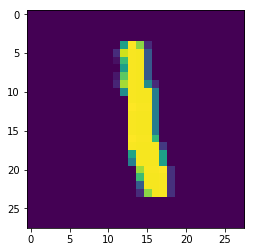

In [66]:
plt.imshow(mnistTrainingData[6,:].reshape(28,28))

In [5]:
val = mnistTrainingData[0]
res = model.predict(mnistTrainingData)
#plt.imshow(res)

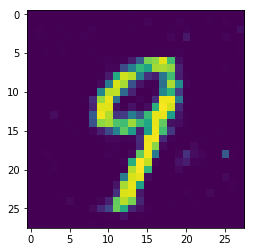

<function __main__.disp>

In [121]:
def disp(idx=0):
    plt.imshow(res[idx].reshape(28,28))
interact(disp,idx=(0,10000))

In [5]:
plt.imshow(mnistTrainingData[idx].reshape(28,28))

NameError: name 'idx' is not defined

In [25]:
noise = np.random.normal(0, 1, (100000, 10))

In [26]:
res = ganModel.predict(noise)

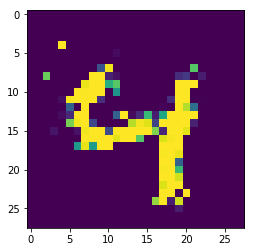

In [38]:
plt.imshow(res[101].reshape(28,28))

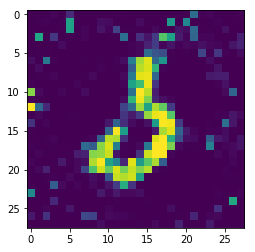

In [88]:
#resNorm = (res - np.min(res))/(np.max(res)-np.min(res))
#resNorm = resNorm.reshape(resNorm.shape[0],28*28)
#plt.imshow(resNorm[7].reshape(28,28))

In [10]:
inputs = Input(shape=(784,))

x = Dense(1000, activation='sigmoid')(inputs)
x = Dense(10, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adadelta',
              loss='mse',
              metrics=['accuracy'])

In [11]:
model.fit(res.reshape(res.shape[0],28*28),noise,epochs=50, batch_size=10)  # starts training

Epoch 1/50
100000/100000 [==============================] - 209s 2ms/step - loss: 0.6673 - acc: 0.6198
Epoch 2/50
100000/100000 [==============================] - 249s 2ms/step - loss: 0.6335 - acc: 0.6926
Epoch 3/50
100000/100000 [==============================] - 276s 3ms/step - loss: 0.6235 - acc: 0.7196
Epoch 4/50
100000/100000 [==============================] - 462s 5ms/step - loss: 0.6178 - acc: 0.7357
Epoch 5/50
100000/100000 [==============================] - 561s 6ms/step - loss: 0.6139 - acc: 0.7495
Epoch 6/50
100000/100000 [==============================] - 304s 3ms/step - loss: 0.6109 - acc: 0.7590
Epoch 7/50
100000/100000 [==============================] - 281s 3ms/step - loss: 0.6087 - acc: 0.7638
Epoch 8/50
100000/100000 [==============================] - 297s 3ms/step - loss: 0.6068 - acc: 0.7703
Epoch 9/50
100000/100000 [==============================] - 283s 3ms/step - loss: 0.6053 - acc: 0.7747
Epoch 10/50
100000/100000 [==============================] - 280s 3ms/ste

KeyboardInterrupt: 

In [12]:
resTest = model.predict(mnistTrainingData)

In [13]:
resGan = ganModel.predict(resTest)

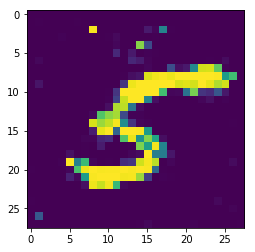

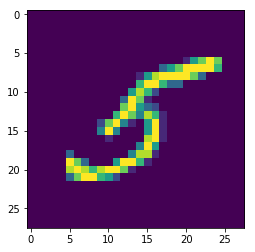

In [46]:
idx = 35



plt.imshow(resGan[idx].reshape(28,28))
plt.show()
plt.imshow(mnistTrainingData[idx].reshape(28,28))
plt.show()

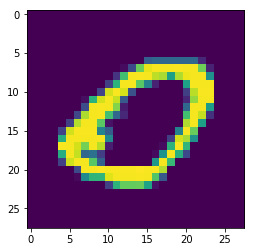

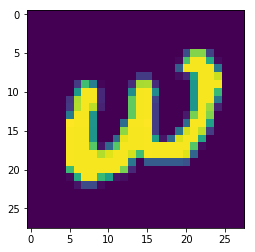

In [55]:
plt.imshow(mnistTrainingData[6].reshape(28,28))